<a href="https://colab.research.google.com/github/IbrahimTGhanem/Datathon3/blob/main/Datathon_3_Group_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1**

**1.1: Importing Libraries and exploring data**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

# Specify the path to the file on your local machine
uploaded = files.upload()

Saving Datathon 3 Data.csv to Datathon 3 Data.csv


In [ ]:
# We have already uploaded the dataset
data = pd.read_csv('Datathon 3 Data.csv')

# View the first few rows of the dataset
data.head()

,Spatial ID,Diabetes type 2 Rate,Diabetes Binary,Mental Health Score,Mental Health Binary,High Education Rate,Median Income,Rate of Regular alcohol drinkers,Rate of Daily Smokers,Food Insecurity,...,Visible Minority Rate,Visible Minority Binary,Low-income Rate,Low-income Binary,Ethnic concentration Index,Ethnic concentration quintiles,Ethnic concentration Binary,Residential Instability Index,Residential Instability quintiles,Residential Instability Binary
0,5350087.0,10.2166,0,4.161916,0,77.2512,201288.72,68.6947,12.0752,1.011765,...,13.7475,0,9.2,0,-0.547437,1,0,0.977882,5,1
1,5350067.0,7.9082,0,4.199644,0,69.6682,198913.88,75.6138,12.0530,1.011812,...,13.6129,0,17.1,0,-0.558009,1,0,0.499012,4,0
2,5350020.0,7.8633,0,4.188188,0,70.3297,195928.10,65.3770,5.8207,1.012514,...,23.0983,0,9.0,0,-0.182563,2,0,0.192181,4,0
3,5350226.0,12.8973,1,4.166097,0,66.2307,220706.92,63.2711,5.6441,1.015853,...,13.7868,0,5.4,0,-0.610314,1,0,-0.754379,1,0
4,5350120.0,8.8100,0,4.192210,0,77.5862,221295.68,70.9360,12.7924,1.015876,...,16.9799,0,5.7,0,-0.841821,1,0,0.307720,4,0


**Table 1: Description of the dataset**

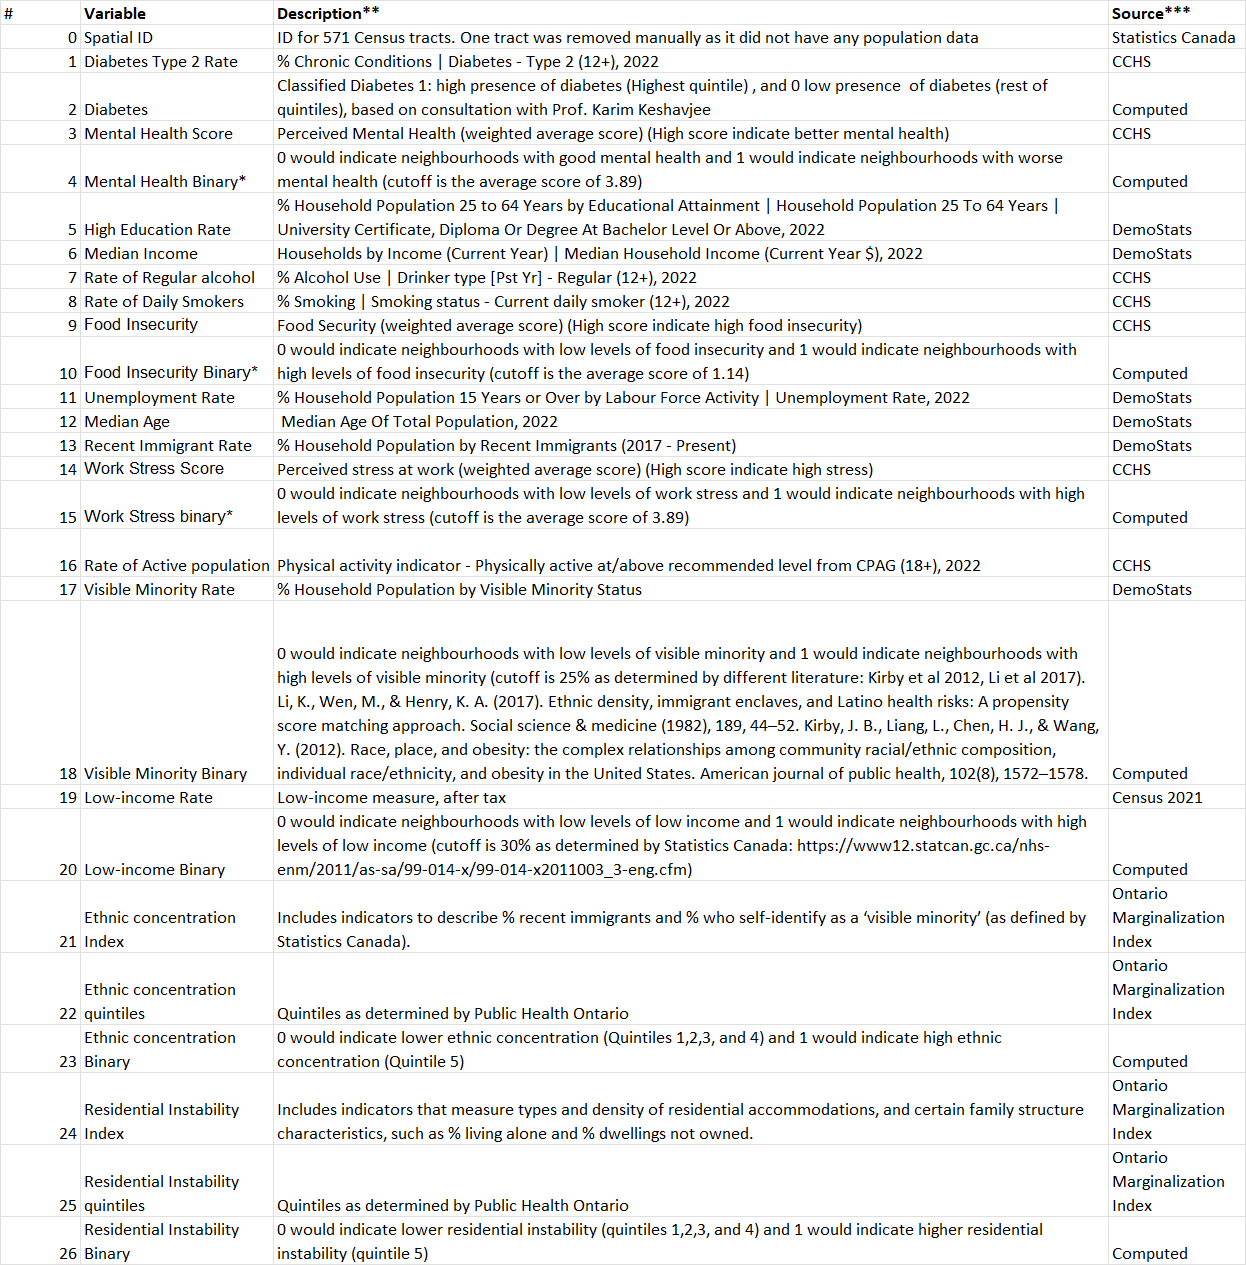

Notes on the dataset: *Cutoff was determined based on the average across all census tracts, due to limited literature available on that aspect
**Binary independent variables were developed to help in the classification methods and to overcome potential correlation with other variables
***Data from different sources were merged using the spatial ID of each census tact

In [ ]:
description = data.describe()
description

,Spatial ID,Diabetes type 2 Rate,Diabetes Binary,Mental Health Score,Mental Health Binary,High Education Rate,Median Income,Rate of Regular alcohol drinkers,Rate of Daily Smokers,Food Insecurity,...,Visible Minority Rate,Visible Minority Binary,Low-income Rate,Low-income Binary,Ethnic concentration Index,Ethnic concentration quintiles,Ethnic concentration Binary,Residential Instability Index,Residential Instability quintiles,Residential Instability Binary
count,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,5.350222e+06,7.754021,0.206655,3.897184,0.423818,47.026623,97909.961173,50.136703,9.958768,1.141647,...,51.180054,0.810858,15.836778,0.038529,0.853701,3.763573,0.350263,0.583728,3.732049,0.318739
std,1.205858e+02,3.492278,0.405261,0.149625,0.494595,17.136116,58162.206873,12.329958,4.352292,0.084775,...,24.654658,0.391965,7.149765,0.192638,0.837165,1.157040,0.477470,0.964936,1.162275,0.466396
min,5.350001e+06,0.000000,0.000000,3.171833,0.000000,8.145900,33617.200000,26.467300,2.245900,1.011765,...,4.848800,0.000000,3.400000,0.000000,-1.339000,1.000000,0.000000,-1.558415,1.000000,0.000000
25%,5.350118e+06,5.237950,0.000000,3.803998,0.000000,32.880650,69362.545000,39.759250,6.810750,1.069947,...,28.735500,1.000000,10.850000,0.000000,0.111442,3.000000,0.000000,-0.093857,3.000000,0.000000
50%,5.350239e+06,7.950800,0.000000,3.913973,0.000000,46.006500,84237.380000,48.252000,8.940700,1.131543,...,49.059500,1.000000,14.700000,0.000000,0.870347,4.000000,0.000000,0.427210,4.000000,0.000000
75%,5.350317e+06,10.117750,0.000000,4.008731,1.000000,61.507950,106165.770000,59.885550,12.684050,1.203673,...,73.121850,1.000000,19.900000,0.000000,1.519419,5.000000,1.000000,1.101113,5.000000,1.000000
max,5.350802e+06,19.800900,1.000000,4.199644,1.000000,81.938000,636507.920000,79.310300,33.503700,1.517383,...,98.758200,1.000000,53.200000,1.000000,3.116274,5.000000,1.000000,3.398448,5.000000,1.000000


In [ ]:
# Printing the dimension of the dataset
print(data.shape)

(571, 27)


**1.2: checking missing values and potential class imbalance**

In [ ]:
# Checking for missing values
print(data.isnull().sum())

Spatial ID                           0
Diabetes type 2 Rate                 0
Diabetes Binary                      0
Mental Health Score                  0
Mental Health Binary                 0
High Education Rate                  0
Median Income                        0
Rate of Regular alcohol drinkers     0
Rate of Daily Smokers                0
Food Insecurity                      0
Food Insecurity Binary               0
Unemployment Rate                    0
Median Age                           0
Recent Immigrant Rate                0
Work Stress Score                    0
Work Stress binary                   0
Rate of Active population            0
Visible Minority Rate                0
Visible Minority Binary              0
Low-income Rate                      0
Low-income Binary                    0
Ethnic concentration Index           0
Ethnic concentration quintiles       0
Ethnic concentration Binary          0
Residential Instability Index        0
Residential Instability q

It appears that there is no missing observations.

In [ ]:
data['Diabetes Level'] = np.where(data['Diabetes Binary'] == 1, 'High', 'Low')

In [ ]:
counts = data['Diabetes Level'].value_counts()

# Define color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='Distribution of Classes in "Diabetes type 2"',
    color_discrete_sequence=colors  # apply your colors here
)

# layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes Type 2'
    ),
    title=dict(
        text='Figure 1: Distribution of Classes in "Diabetes type 2"',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

While there are no missing values in the dataset, there is a clear class imbalance in the label/target variable where only 20% of the neighbourhoods (observations) are with high presence of diabetes. This issue entails the need for either upsampling or downsampling, which will be tackled before running classification models.

**Section 2**

**2.1: Visualizing and Exploring variables and correlation analysis**

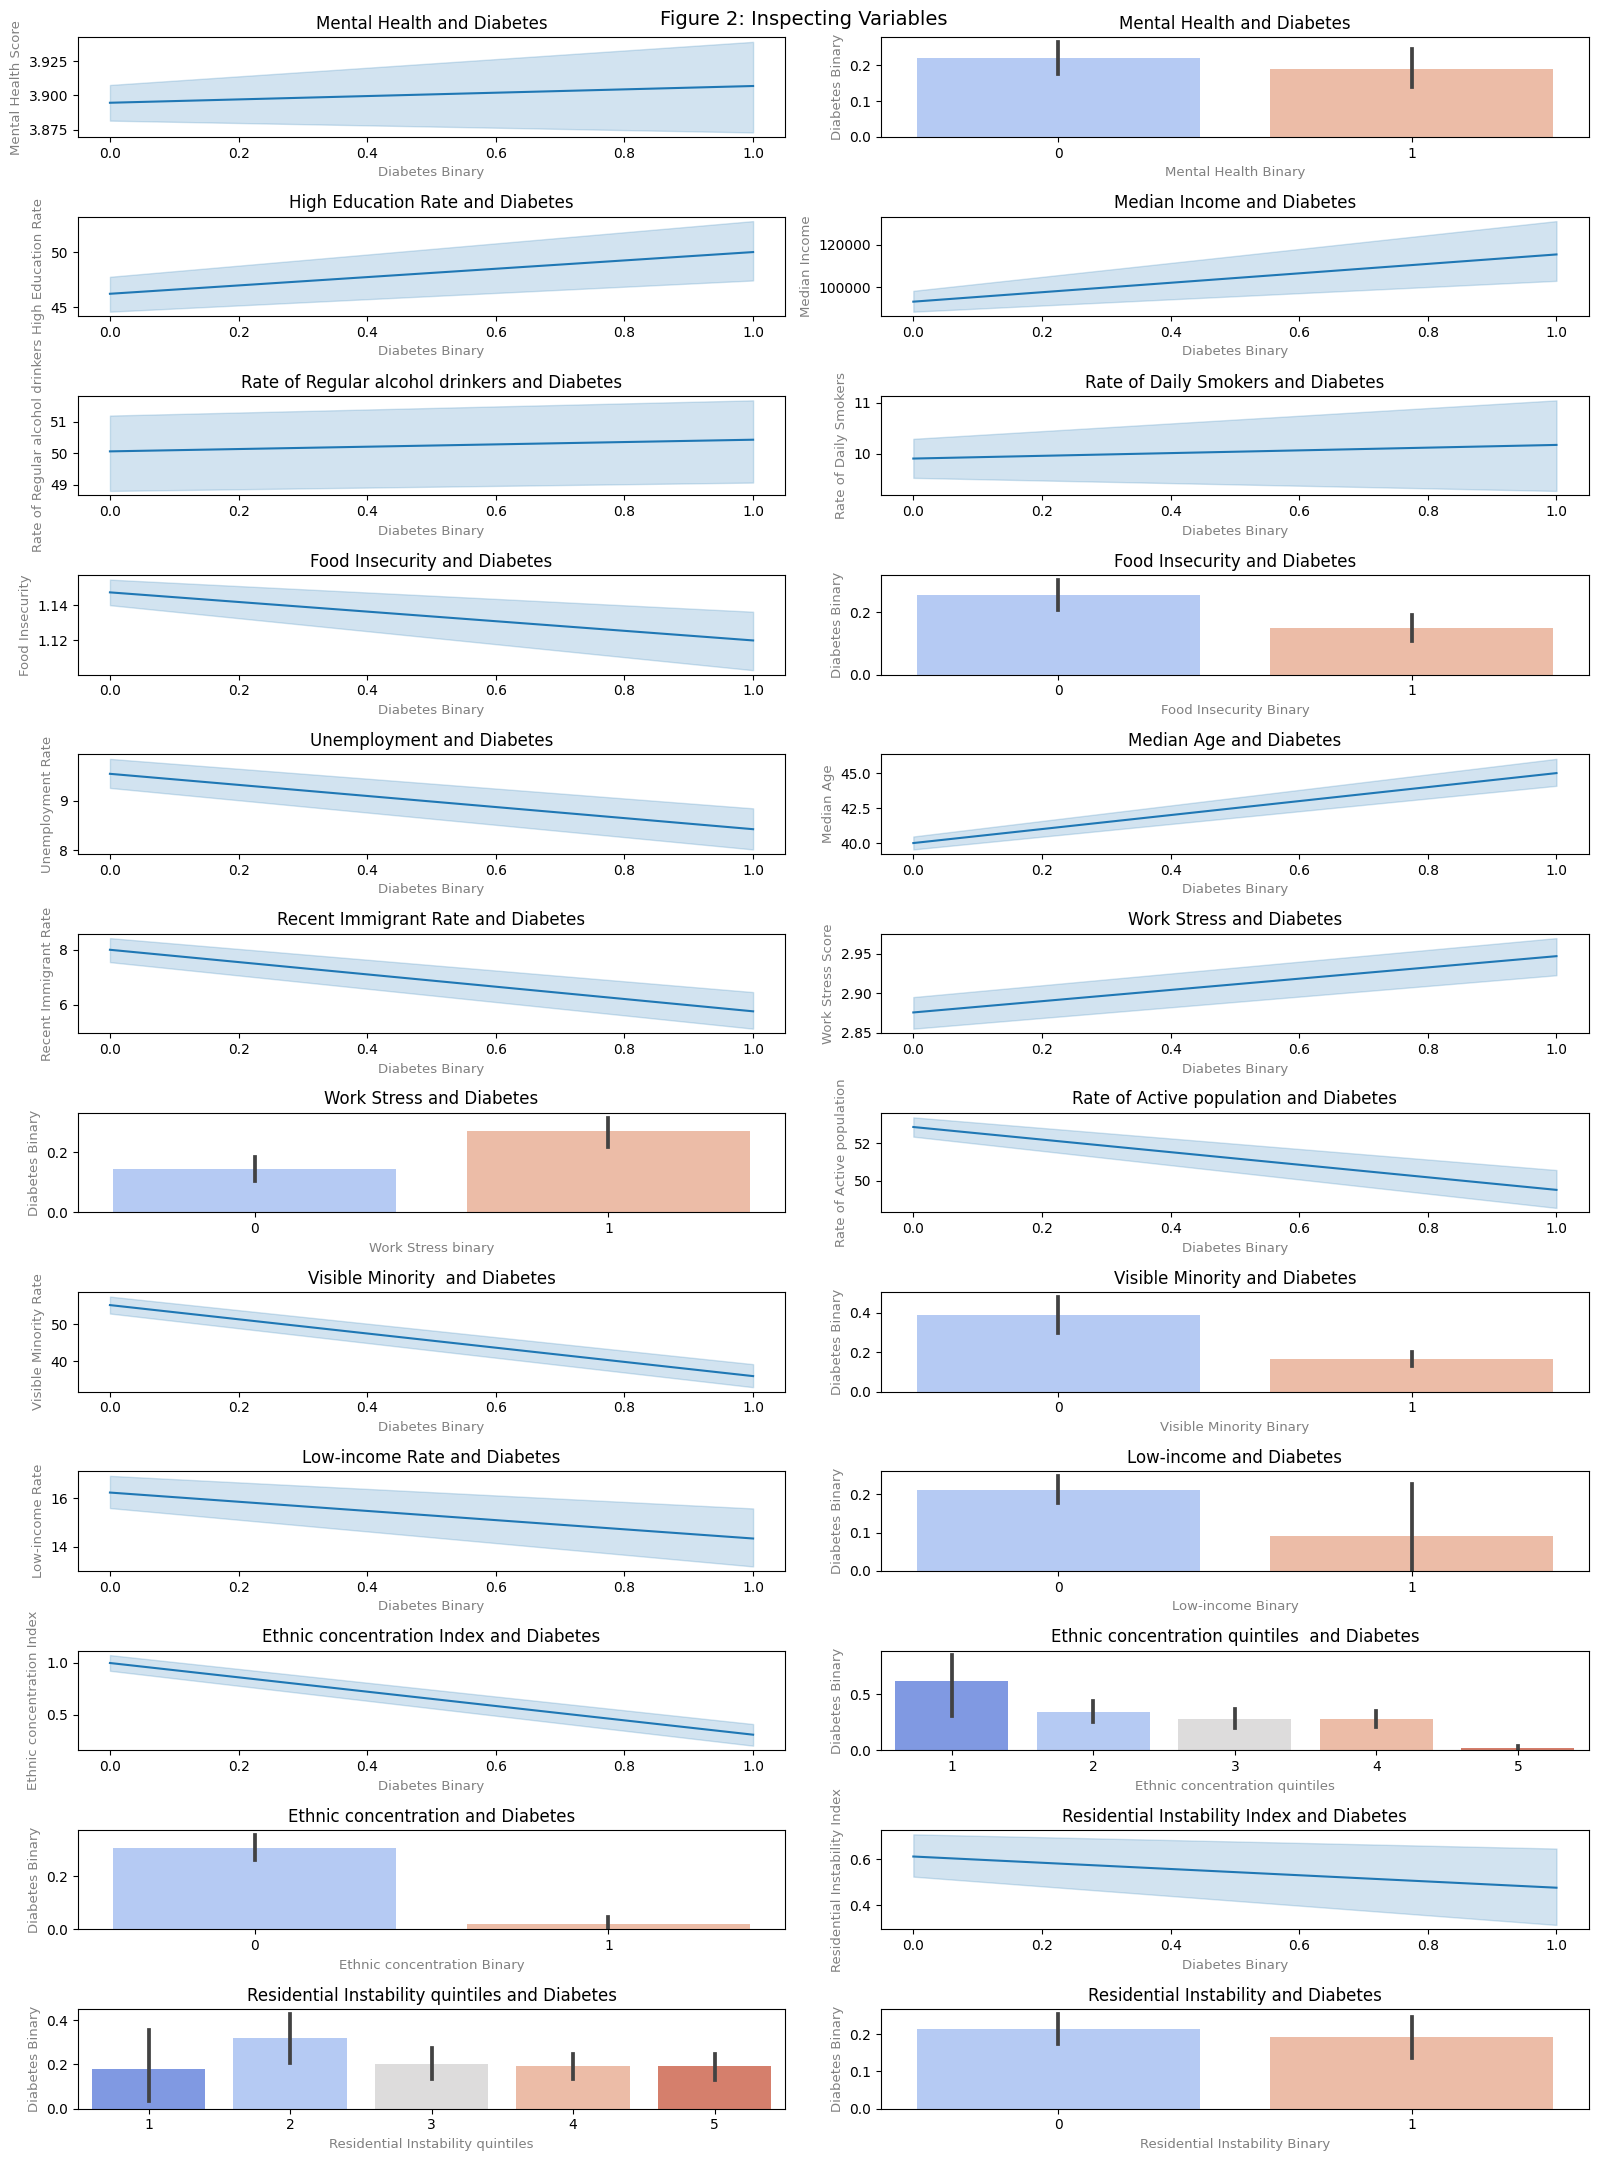

In [ ]:
fig, axes = plt.subplots(12, 2, figsize=(16, 22))
sns.lineplot(data=data, x="Diabetes Binary", y="Mental Health Score", palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Mental Health and Diabetes")

sns.barplot(data=data, x="Mental Health Binary", y="Diabetes Binary", palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("Mental Health and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="High Education Rate", palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("High Education Rate and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Median Income", palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Median Income and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Rate of Regular alcohol drinkers", palette='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title("Rate of Regular alcohol drinkers and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Rate of Daily Smokers", palette='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title("Rate of Daily Smokers and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Food Insecurity", palette='coolwarm', ax=axes[3, 0])
axes[3, 0].set_title("Food Insecurity and Diabetes")

sns.barplot(data=data, x="Food Insecurity Binary", y="Diabetes Binary", palette='coolwarm', ax=axes[3, 1])
axes[3, 1].set_title("Food Insecurity and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Unemployment Rate", palette='coolwarm', ax=axes[4, 0])
axes[4, 0].set_title("Unemployment and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Median Age", palette='coolwarm', ax=axes[4, 1])
axes[4, 1].set_title("Median Age and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Recent Immigrant Rate", palette='coolwarm', ax=axes[5, 0])
axes[5, 0].set_title("Recent Immigrant Rate and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Work Stress Score", palette='coolwarm', ax=axes[5, 1])
axes[5, 1].set_title("Work Stress and Diabetes")

sns.barplot(data=data, x="Work Stress binary", y="Diabetes Binary", palette='coolwarm', ax=axes[6, 0])
axes[6, 0].set_title("Work Stress and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Rate of Active population", palette='coolwarm', ax=axes[6, 1])
axes[6, 1].set_title("Rate of Active population and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Visible Minority Rate", palette='coolwarm', ax=axes[7, 0])
axes[7, 0].set_title("Visible Minority  and Diabetes")

sns.barplot(data=data, x="Visible Minority Binary", y="Diabetes Binary", palette='coolwarm', ax=axes[7, 1])
axes[7, 1].set_title("Visible Minority and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Low-income Rate", palette='coolwarm', ax=axes[8, 0])
axes[8, 0].set_title("Low-income Rate and Diabetes")

sns.barplot(data=data, x="Low-income Binary", y="Diabetes Binary", palette='coolwarm', ax=axes[8, 1])
axes[8, 1].set_title("Low-income and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Ethnic concentration Index", palette='coolwarm', ax=axes[9, 0])
axes[9, 0].set_title("Ethnic concentration Index and Diabetes")

sns.barplot(data=data, x="Ethnic concentration quintiles", y="Diabetes Binary", palette='coolwarm', ax=axes[9, 1])
axes[9, 1].set_title("Ethnic concentration quintiles  and Diabetes")

sns.barplot(data=data, x="Ethnic concentration Binary", y="Diabetes Binary", palette='coolwarm', ax=axes[10, 0])
axes[10, 0].set_title("Ethnic concentration and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="Residential Instability Index", palette='coolwarm', ax=axes[10, 1])
axes[10, 1].set_title("Residential Instability Index and Diabetes")

sns.barplot(data=data, x="Residential Instability quintiles", y="Diabetes Binary", palette='coolwarm', ax=axes[11, 0])
axes[11, 0].set_title("Residential Instability quintiles and Diabetes")

sns.barplot(data=data, x="Residential Instability Binary", y="Diabetes Binary", palette='coolwarm', ax=axes[11, 1])
axes[11, 1].set_title("Residential Instability and Diabetes")

plt.suptitle("Figure 2: Inspecting Variables", fontsize=14, color='black')

for row in axes:
    for ax in row:
        ax.set_xlabel(ax.get_xlabel(), color='grey', fontsize=9.5)
        ax.set_ylabel(ax.get_ylabel(), color='grey', fontsize=9.5)

#plot layout
plt.tight_layout()

#visualize plots
plt.show()

Based on visual inspection of plots, most of the variables appear to have significant association with diabetes. Yet, there are three aspects that worth noting. First, differences in rate of regular alcohol drinkers is not significant, when compared against diabetes. Thus, this variable can be excluded from analysis. Similarity, differences in quintiles of residential instability are not significant. Thus, this variable can be also excluded from the analysis. Second, an interaction term between lower ethnic concentration quintiles (1 and 2) and lower instability quintiles (1 and 2) might help improve the prediction model. Third, there might be potential correlation levels between a number of continuous variables which might impact the design of the ML model. Thus, in the next stage this interaction term along with correlation will be examined.

In [ ]:
#Investigating interaction term low instability and
data['Low Instability and Diversity'] = 0

# Setting the values to 1 where both conditions are met
data.loc[(data['Residential Instability quintiles'].isin([1, 2])) & (data['Ethnic concentration quintiles'].isin([1, 2])), 'Low Instability and Diversity'] = 1

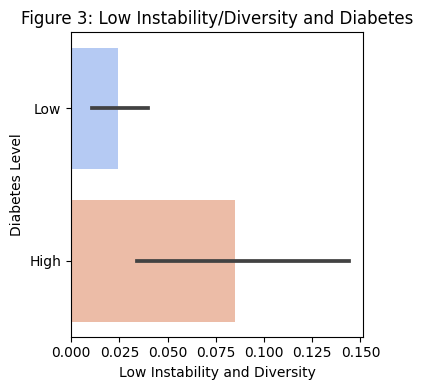

In [ ]:
#Visualizing the new interaction term
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

# Plot the subplot
sns.barplot(data=data, x="Low Instability and Diversity", y="Diabetes Level", palette='coolwarm', ax=axes)
axes.set_title("Figure 3: Low Instability/Diversity and Diabetes")

# Adjust the layout and display the plot
plt.tight_layout()

# Visualize the plot
plt.show()

It appears that differences in the values of this new interaction term may help in predicting diabetes

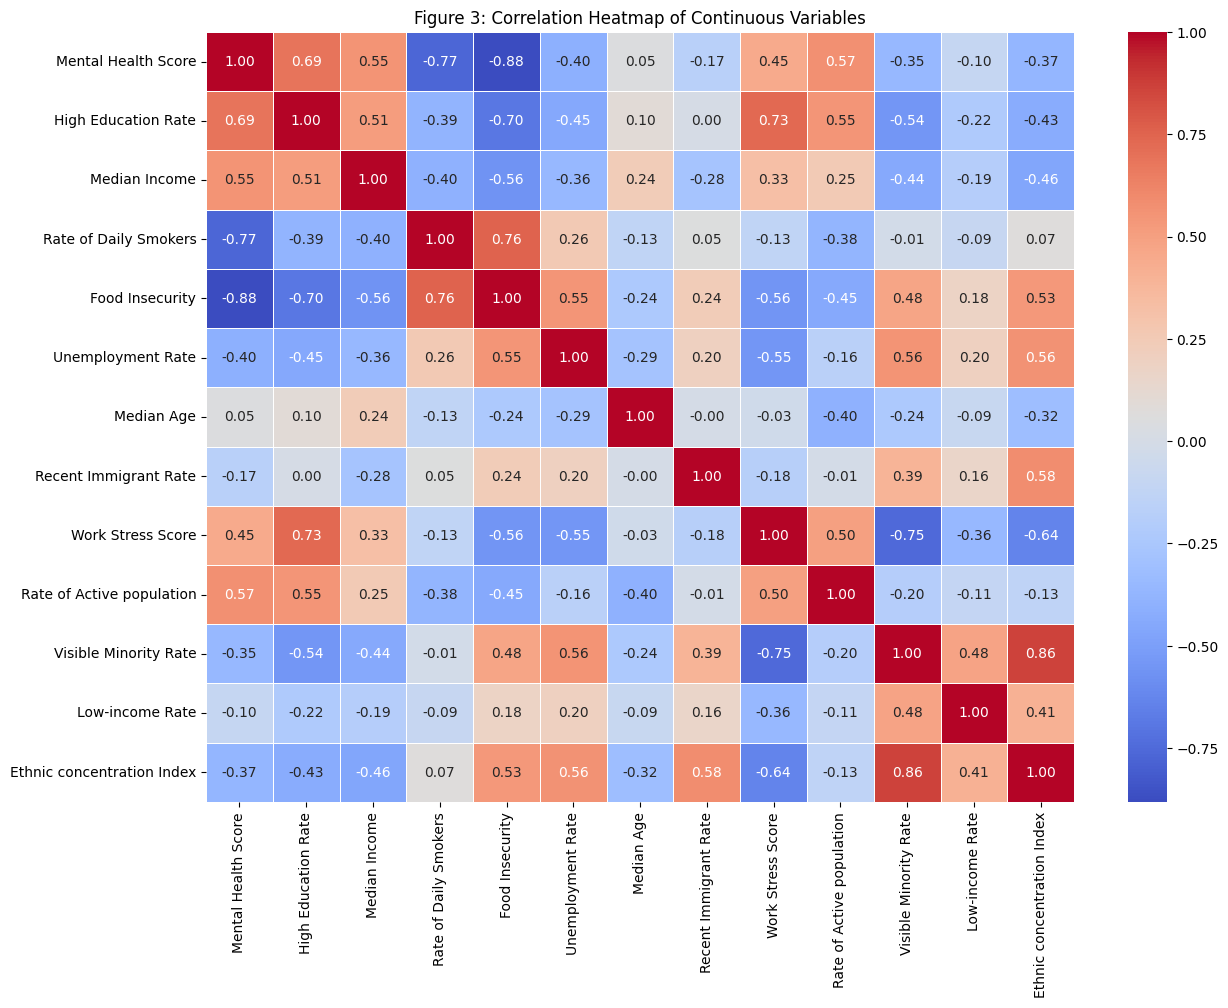

In [ ]:
#correlationMatrix
ContinuousVariables = data[['Mental Health Score', 'High Education Rate', 'Median Income','Rate of Daily Smokers','Food Insecurity',	'Unemployment Rate','Median Age','Recent Immigrant Rate','Work Stress Score','Rate of Active population','Visible Minority Rate','Low-income Rate', 'Ethnic concentration Index']]


correlationMatrix = ContinuousVariables.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 3: Correlation Heatmap of Continuous Variables')
plt.show()

With Regard to correlation analysis, for absolute values of r, 0-0.19 is considered as very weak, 0.2-0.39 as weak, 0.40-0.59 as moderate, 0.6-0.79 as strong and 0.8-1 as very strong correlation. In this ML model, the aim is to not have any correlation above 0.6 among independent variables. Thus,
(1) the variable of mental health score will be removed as it is correlated with food insecurity and Median Income
insecurity and smoking.
(2) The variable of High Education Rate will be removed as it is correlated with Work Stress score and Rate of Daily Smokers.
(3) The variable of Food insecurity will be removed as it is correlated with Rate of Daily Smokers.
(4) The variables of the visible Minority Rate and the ethnic concentration index will be removed as they are correlated with Work Stress score.
Below is a filtered set of continuous variables.

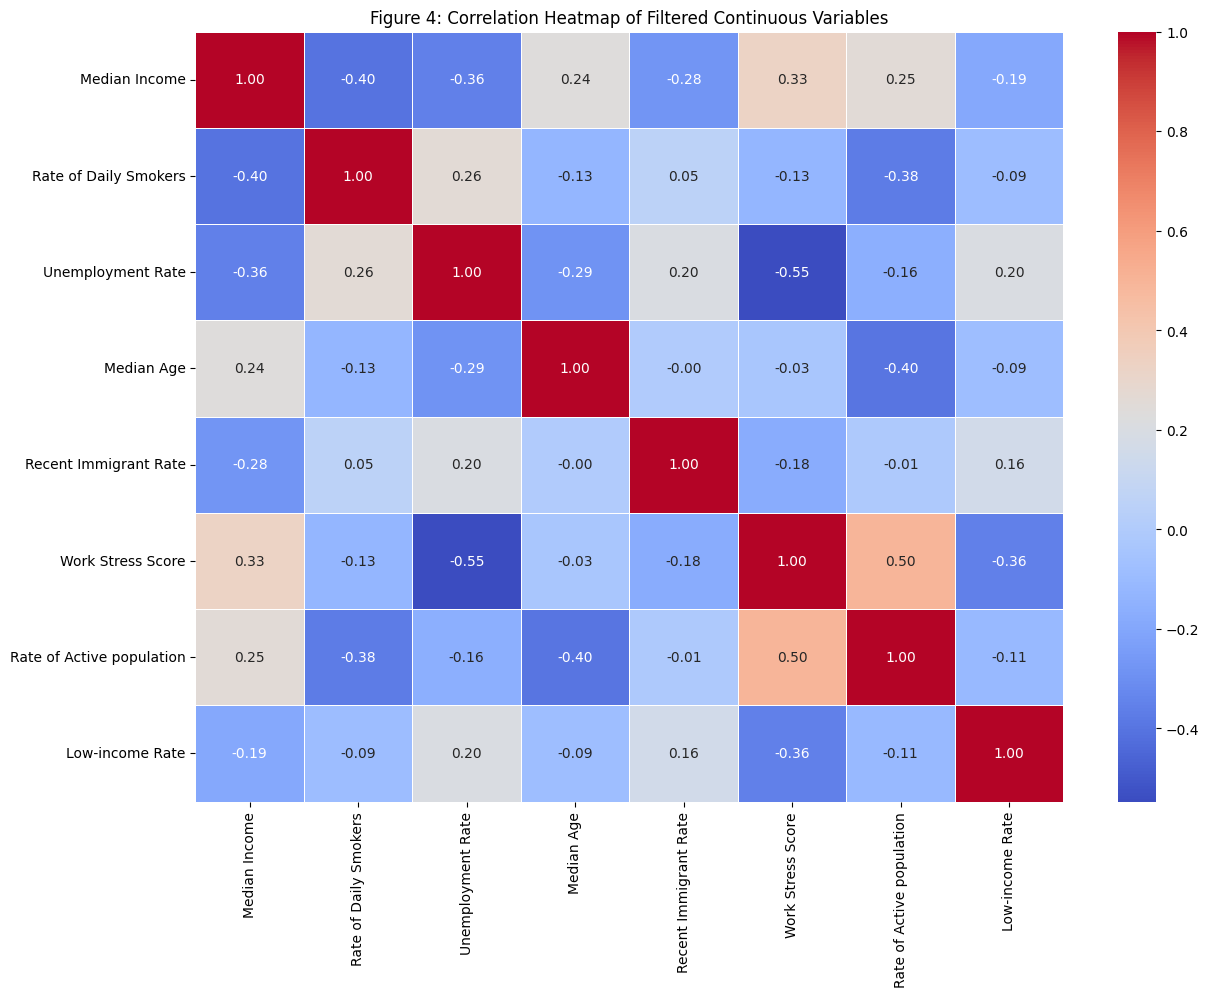

In [ ]:
#correlationMatrix
ContinuousVariables2 = data[['Median Income','Rate of Daily Smokers',	'Unemployment Rate','Median Age','Recent Immigrant Rate','Work Stress Score','Rate of Active population','Low-income Rate']]


correlationMatrix = ContinuousVariables2.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Figure 4: Correlation Heatmap of Filtered Continuous Variables')
plt.show()

**2.2: Exploring distribution of variables (non-scaled and scaled for the purposes of checking for outliers and potential transformations)**

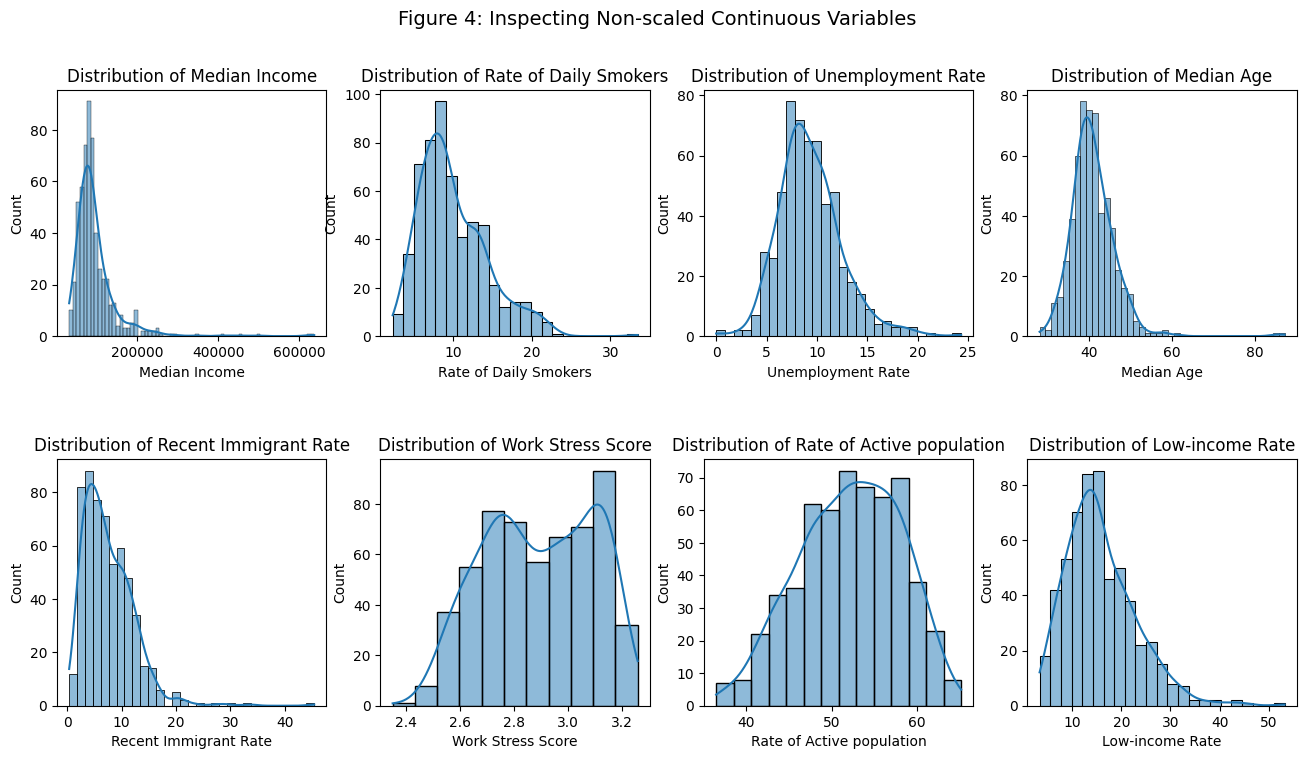

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Figure 4: Inspecting Non-scaled Continuous Variables", fontsize=14, color='black')

for i, col in enumerate(ContinuousVariables2.columns):
    sns.histplot(data[ContinuousVariables2.columns[i]], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Distribution of {col}')

plt.show()

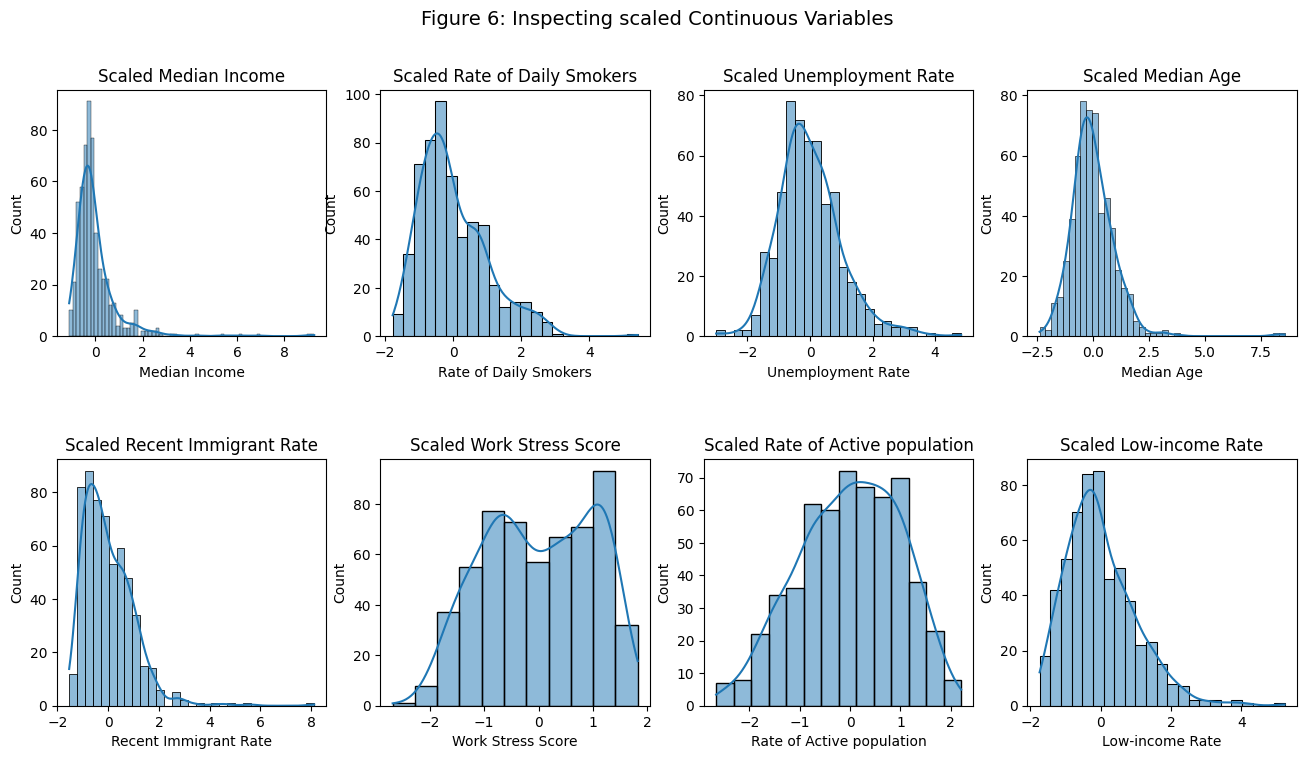

In [ ]:
scaler = StandardScaler()

# Scale the continuous variables
scaled_variables = scaler.fit_transform(ContinuousVariables2)

# Create a DataFrame from the scaled variables
scaled_df = pd.DataFrame(scaled_variables, columns=ContinuousVariables2.columns)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)
plt.suptitle("Figure 6: Inspecting scaled Continuous Variables", fontsize=14, color='black')

# Create histograms for scaled continuous variables
for i, col in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[col], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Scaled {col}')

plt.show()

The variables of Median income, median age, and recent immigrant rate have potential outliers, which require further investigation.

**2.3: Examining outliers and potential transformations**

In [ ]:
#Defining a Z-score threshold
zscore_threshold = 3

# Iterate through each continuous variable and print potential outliers
for variable_name in ContinuousVariables2:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers = data_column[abs(z_scores) > zscore_threshold]
    print(f"Outliers in '{variable_name}':")
    print(outliers)
    print("\n")

Outliers in 'Median Income':
9     624945.81
11    450381.54
12    409129.72
27    346373.14
32    636507.92
33    495294.78
78    286999.27
85    296697.90
Name: Median Income, dtype: float64


Outliers in 'Rate of Daily Smokers':
560    23.1529
570    33.5037
Name: Rate of Daily Smokers, dtype: float64


Outliers in 'Unemployment Rate':
113     0.0
205     0.0
303    19.9
505    24.3
508    19.9
525    19.3
551    21.4
Name: Unemployment Rate, dtype: float64


Outliers in 'Median Age':
18     57.3
21     58.3
66     58.0
146    61.5
205    84.9
570    87.2
Name: Median Age, dtype: float64


Outliers in 'Recent Immigrant Rate':
201    23.6495
205    33.5648
215    22.0062
266    29.4757
285    27.3953
570    45.4545
Name: Recent Immigrant Rate, dtype: float64


Outliers in 'Work Stress Score':
Series([], Name: Work Stress Score, dtype: float64)


Outliers in 'Rate of Active population':
Series([], Name: Rate of Active population, dtype: float64)


Outliers in 'Low-income Rate':
77    

It appears that there are 35 observations in five variables, that are potential outliers. Thus, while fitting logistic regression model, a sensitivity analysis will be conducted to examine the influence of these outliers on predicting diabetes. To tackle this issue log transformation will be applied for the variables that appears to be not normally distributed and that have extreme outliers’ values. This will mainly include Median Income and Recent Immigrant Rate.

In [ ]:
data['log_median_income'] = np.log(data['Median Income'])
data['log_recent_immigrant'] = np.log(data['Recent Immigrant Rate'])


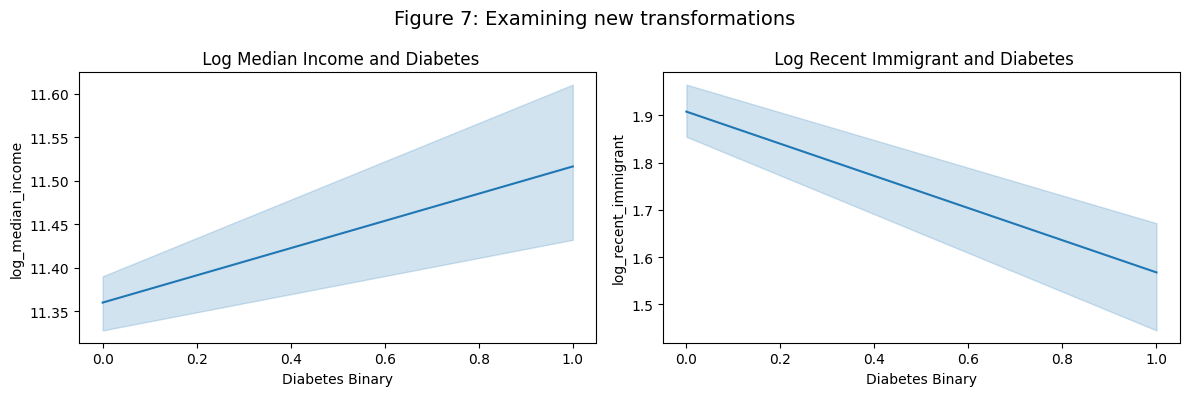

In [ ]:
# Create a single plot with one subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the subplot
sns.lineplot(data=data, x="Diabetes Binary", y="log_median_income", palette='coolwarm', ax=axes[0])
axes[0].set_title(" Log Median Income and Diabetes")

sns.lineplot(data=data, x="Diabetes Binary", y="log_recent_immigrant", palette='coolwarm', ax=axes[1])
axes[1].set_title(" Log Recent Immigrant and Diabetes")

plt.suptitle("Figure 7: Examining new transformations", fontsize=14, color='black')

# Adjusting the layout and display the plot
plt.tight_layout()

# Visualizing the plot
plt.show()

Based on the inspection of the two plots above, it appears that they might be associated with prediction of diabetes. Thus, they will be included in the analysis.

Based on the examination of the variables so far, the 13 shortlisted independent variables are as follow: Mental Health Binary, Log Median Income, Rate of Daily smokers, Food insecurity Binary, Unemployment rate, Median Age, Log Recent Immigrant Rate, work Stress Score, Rate of Active Population, Visible Minority Binary, Low-income Rate, Ethnic Concentration Binary, and Low Instability and Diversity

**Section 3: Further filteration of independent variables**

**Section 3.1: Tackling Class imbalance and application of General Logistic Regression model**


In [ ]:
# Defining the features (independent variables) and the target variable (dependent variable)
features1 = ['Mental Health Binary', 'log_median_income', 'Rate of Daily Smokers', 'Food Insecurity Binary', 'Unemployment Rate', 'Median Age', 'log_recent_immigrant', 'Work Stress Score', 'Rate of Active population', 'Visible Minority Binary', 'Low-income Rate', 'Ethnic concentration Binary', 'Low Instability and Diversity']

X1 = data[features1]  # Features
y1 = data['Diabetes Binary']  # Target variable

 Highly imbalanced dataset (i.e., one class is predominant), might lead to the situation where a predictive model might not able to make meaningful distinctions between the classes. Thus, Synthetic Minority Over-sampling Technique (SMOTE) will be applied to generate new synthetic samples for the minority class that are combinations of that sample and its closest neighbors. This method was selected over other methods (i.e., Random sampling) as it preserves the original distribution of the majority class.

In [ ]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Application of SMOTE for upsampling on the training data
smote = SMOTE()
X1_resampled, y1_resampled = smote.fit_resample(X1_train, y1_train)

# Normalizing data
scaler = StandardScaler()
X1_resampled = scaler.fit_transform(X1_resampled)
X1_test = scaler.transform(X1_test)

Below is the application of regularization technique (L2) which prevents overfitting by controlling of the magnitude od independent variables coefficients. Moderate regularization level was set at 1.

In [ ]:
log_reg1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg1.fit(X1_resampled, y1_resampled)

LogisticRegression(solver='liblinear')

Next, cross-validation with 5 folds was used to ensure that the model’s performance is being assessed over different subsets of the training data, which in turn, ensures the robustness of the performance. Additionally, while all evaluation measurements are important in the model, the recall metric, which presents correct prediction among positive cases, have higher importance as failing to identify neighbourhoods (observations) that has high presence of diabetes (False negative) may have detrimental impact on public health, when compared to failing to identify neighbourhoods with low presence of diabetes (false positive). Thus, this metric will guide the selection of the classifier.

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels1 = cross_val_predict(log_reg1, X1_resampled, y1_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix1 = confusion_matrix(y1_resampled, predicted_labels1)

# Calculate the full classification report
class_report1 = classification_report(y1_resampled, predicted_labels1)

# Calculate accuracy
accuracy_GLM1 = accuracy_score(y1_resampled, predicted_labels1)

# Calculate precision
precision_GLM1 = precision_score(y1_resampled, predicted_labels1)

# Calculate recall
recall1_GLM1 = recall_score(y1_resampled, predicted_labels1)

# Calculate F1 score
f1_GLM1 = f1_score(y1_resampled, predicted_labels1)


# Print the full confusion matrix and classification report
print("Table 2: General Logistic Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix1)
print("B. Classification Report:")
print(class_report1)
print("C. Accuracy: {:.2f}".format(accuracy_GLM1))
print("D. Precision: {:.2f}".format(precision_GLM1))
print("E. Recall (Sensitivity): {:.2f}".format(recall1_GLM1))
print("F. F1 Score: {:.2f}".format(f1_GLM1))

Table 2: General Logistic Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[286  80]
 [ 36 330]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       366
           1       0.80      0.90      0.85       366

    accuracy                           0.84       732
   macro avg       0.85      0.84      0.84       732
weighted avg       0.85      0.84      0.84       732

C. Accuracy: 0.84
D. Precision: 0.80
E. Recall (Sensitivity): 0.90
F. F1 Score: 0.85


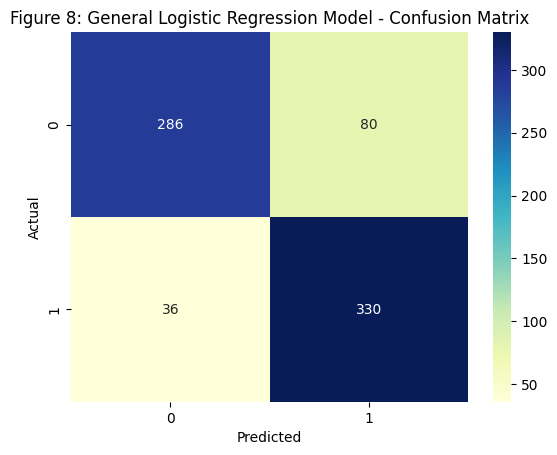

In [ ]:
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Figure 8: General Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

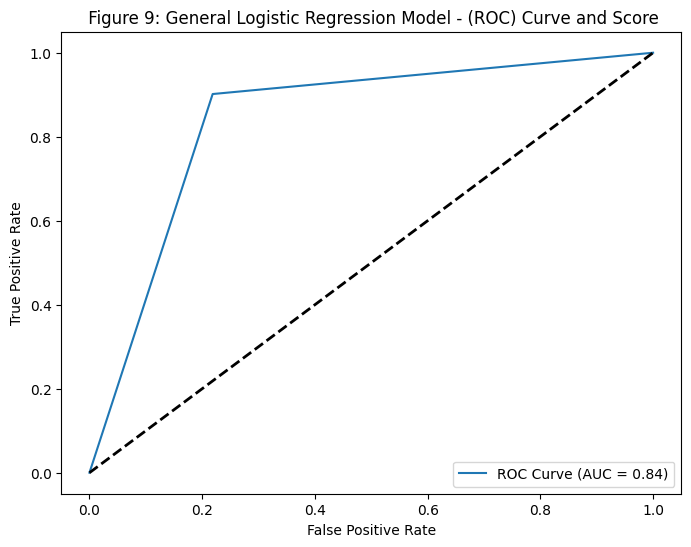

In [ ]:
predicted_probs1 = cross_val_predict(log_reg1, X1_resampled, y1_resampled, cv=5)

# Calculate ROC-AUC
roc_auc1 = roc_auc_score(y1_resampled, predicted_probs1)

# Calculate ROC curve
fpr1, tpr1, _ = roc_curve(y1_resampled, predicted_probs1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'ROC Curve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Figure 9: General Logistic Regression Model - (ROC) Curve and Score')
plt.legend(loc='lower right')
plt.show()

Table 3: Summary of the general logistic regression model


In [ ]:
# Create and fit logistic regression model
log_reg1_fit = sm.Logit(y1_resampled, X1_resampled).fit()

# Get summary report
summary1 = log_reg1_fit.summary()
print(summary1)

Optimization terminated successfully.
         Current function value: 0.384661
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes Binary   No. Observations:                  732
Model:                          Logit   Df Residuals:                      719
Method:                           MLE   Df Model:                           12
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.4451
Time:                        02:38:26   Log-Likelihood:                -281.57
converged:                       True   LL-Null:                       -507.38
Covariance Type:            nonrobust   LLR p-value:                 4.271e-89
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6275      0.197     -3.184      0.001      -1.014      -0.241
x2            -0.4766      0.

While this general logistic regression model has high accuracy prediction rate and six significant variables in terms of p-values, this model appears to be very complex and has apotential for overfitting. Thus, there is a need to apply additional feature selection tool. I will be engaging with this aspect in section 4.

**Section 4**

**4.1 Applying Recursive Feature Elimination with Cross-Validation for Logistic regession**



As this model has 13 variables, testing all combinations might be infeasible. Thus, the recursive feature elimination with cross validation (RFECV) will be applied to find the optimal subset of variables that maximizes the performance of the model while also avoiding overfitting. The evaluation metric here will be the recall score. Removing less important variables will make the model more interpretable, and more generalizable to unseen data. The tool initiates optimization with all variables included; thereafter, eliminates one variables at a time. The tool relies on the average performance score of the model on the test data through each iteration.

In [ ]:
#setting custom scorer
recall_scoring = make_scorer(recall_score)

In [ ]:
Log_reg_model = LogisticRegression()

cv_LR = StratifiedKFold(3)
rfecv_LR = RFECV(
    estimator=Log_reg_model,
    step=1,
    cv=cv_LR,
    scoring=recall_scoring,
    min_features_to_select=1,
)
rfecv_LR.fit(X1_resampled, y1_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features -LR: {rfecv_LR.n_features_}")

Optimal number of features -LR: 6


In [ ]:
# which columns used and which wasn't
rfecv_LR.support_

array([ True, False,  True, False, False,  True, False,  True,  True,
       False, False,  True, False])

In [ ]:
rfecv_LR.ranking_

array([1, 4, 1, 7, 6, 1, 5, 1, 1, 2, 3, 1, 8])

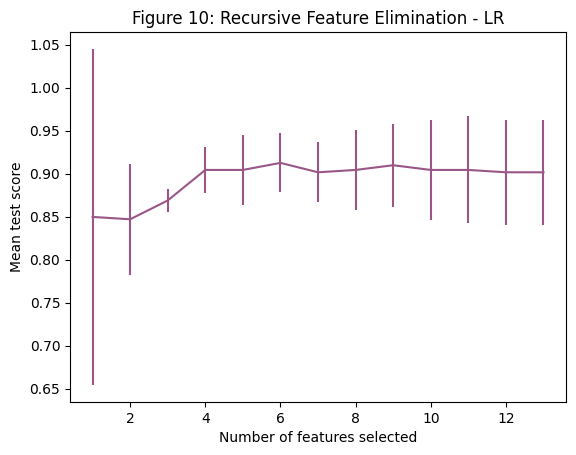

In [ ]:
# Calculate the number of different feature selections tested
n_scores_LR = len(rfecv_LR.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores_LR + 1),
    rfecv_LR.cv_results_["mean_test_score"],
    yerr=rfecv_LR.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Figure 10: Recursive Feature Elimination - LR")

# Show the plot
plt.show()

The plot above helps in visualizing the relationship between the number of selected features and the model's perfomance. It appears that a susbet of 6 variables would have the highest score of 0.91

In [ ]:
selected_LR_features = X1.columns[rfecv_LR.support_]
eliminated_LR_features = X1.columns[~rfecv_LR.support_]

print("Selected Features:")
print(selected_LR_features)

print("\nEliminated Features:")
print(eliminated_LR_features)


Selected Features:
Index(['Mental Health Binary', 'Rate of Daily Smokers', 'Median Age',
       'Work Stress Score', 'Rate of Active population',
       'Ethnic concentration Binary'],
      dtype='object')

Eliminated Features:
Index(['log_median_income', 'Food Insecurity Binary', 'Unemployment Rate',
       'log_recent_immigrant', 'Visible Minority Binary', 'Low-income Rate',
       'Low Instability and Diversity'],
      dtype='object')


In [ ]:

# Access the mean test scores
mean_test_scores_LR = rfecv_LR.cv_results_["mean_test_score"]

# Print the list of mean test scores
print("Mean Test Scores:")
for score_LR in mean_test_scores_LR:
    print(score_LR)


Mean Test Scores:
0.8497267759562841
0.8469945355191256
0.8688524590163934
0.9043715846994536
0.9043715846994536
0.9125683060109289
0.9016393442622951
0.9043715846994536
0.9098360655737704
0.9043715846994536
0.9043715846994536
0.9016393442622951
0.9016393442622951


In [ ]:
# Define the features (independent variables) and the target variable (dependent variable)
features2 = ['Mental Health Binary', 'Rate of Daily Smokers', 'Median Age','Work Stress Score', 'Rate of Active population', 'Ethnic concentration Binary']

X2 = data[features2]  # Features
y2 = data['Diabetes Binary']  # Target variable

In [ ]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Apply SMOTE for upsampling on the training data
smote = SMOTE()
X2_resampled, y2_resampled = smote.fit_resample(X2_train, y2_train)

# Normalizing data
scaler = StandardScaler()
X2_resampled = scaler.fit_transform(X2_resampled)
X2_test = scaler.transform(X2_test)

In [ ]:
log_reg2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg2.fit(X2_resampled, y2_resampled)

LogisticRegression(solver='liblinear')

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels2 = cross_val_predict(log_reg2, X2_resampled, y2_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix2 = confusion_matrix(y2_resampled, predicted_labels2)

# Calculate the full classification report
class_report2 = classification_report(y2_resampled, predicted_labels2)

# Calculate accuracy
accuracy_LR = accuracy_score(y2_resampled, predicted_labels2)

# Calculate precision
precision_LR = precision_score(y2_resampled, predicted_labels2)

# Calculate recall
recall1_LR = recall_score(y2_resampled, predicted_labels2)

# Calculate F1 score
f1_LR = f1_score(y2_resampled, predicted_labels2)


# Print the full confusion matrix and classification report
print("Table 4A: Filtered Logistic Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix2)
print("B. Classification Report:")
print(class_report2)
print("C. Accuracy: {:.2f}".format(accuracy_LR))
print("D. Precision: {:.2f}".format(precision_LR))
print("E. Recall (Sensitivity): {:.2f}".format(recall1_LR))
print("F. F1 Score: {:.2f}".format(f1_LR))

Table 4: Filtered Logistic Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[285  81]
 [ 31 335]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       366
           1       0.81      0.92      0.86       366

    accuracy                           0.85       732
   macro avg       0.85      0.85      0.85       732
weighted avg       0.85      0.85      0.85       732

C. Accuracy: 0.85
D. Precision: 0.81
E. Recall (Sensitivity): 0.92
F. F1 Score: 0.86


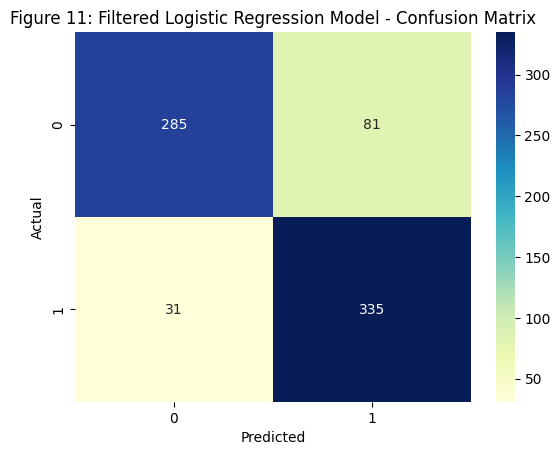

In [ ]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Figure 11: Filtered Logistic Regression Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

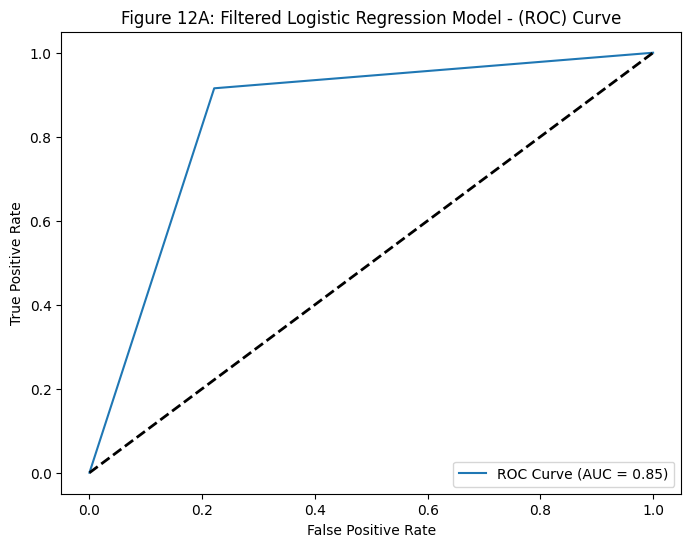

In [ ]:
predicted_probs2 = cross_val_predict(log_reg2, X2_resampled, y2_resampled, cv=5)

# Calculate ROC-AUC
roc_auc2 = roc_auc_score(y2_resampled, predicted_probs2)

# Calculate ROC curve
fpr2, tpr2, _ = roc_curve(y2_resampled, predicted_probs2)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label=f'ROC Curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 12A: Filtered Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of Logit Regression
y_pred_test_LR = log_reg2.predict(X2_test)

# Calculating metrics
accuracy_test_LR = accuracy_score(y2_test, y_pred_test_LR)
precision_test_LR = precision_score(y2_test, y_pred_test_LR)
recall_test_LR = recall_score(y2_test, y_pred_test_LR)
f1_test_LR = f1_score(y2_test, y_pred_test_LR)
conf_matrix_test_LR = confusion_matrix(y2_test, y_pred_test_LR)

# Printing the evaluation metrics
print("Table 4B: Filtered Logistic Model - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_LR))
print("Precision: {:.2f}".format(precision_test_LR))
print("Recall (Sensitivity): {:.2f}".format(recall_test_LR))
print("F1 Score: {:.2f}".format(f1_test_LR))
print("Confusion Matrix:")
print(conf_matrix_test_LR)

Table 4B: Filtered Logistic Model - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.77
Precision: 0.53
Recall (Sensitivity): 0.75
F1 Score: 0.62
Confusion Matrix:
[[68 19]
 [ 7 21]]


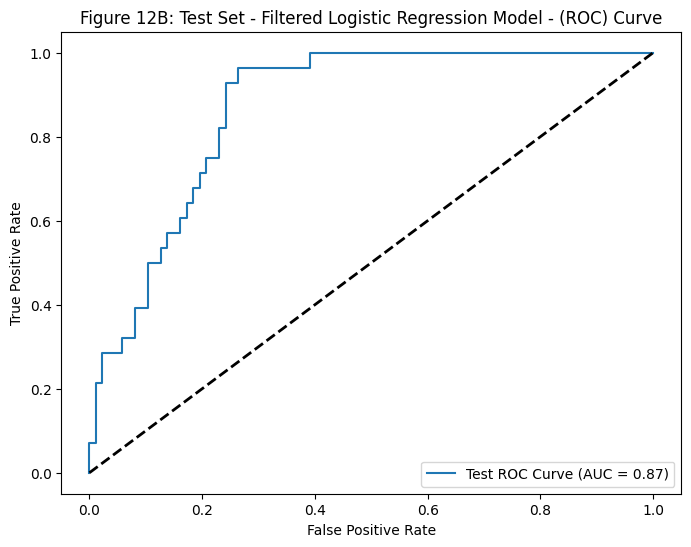

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_LR = log_reg2.predict_proba(X2_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_LR = roc_auc_score(y2_test, predicted_probs_test_LR)

# Calculate ROC curve on the test set
fpr_test_LR, tpr_test_LR, _ = roc_curve(y2_test, predicted_probs_test_LR)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_LR, tpr_test_LR, label=f'Test ROC Curve (AUC = {roc_auc_test_LR:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 12B: Test Set - Filtered Logistic Regression Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Table 5: Summary of the Filtered logistic regression model

In [ ]:
import numpy as np
import statsmodels.api as sm

# Create and fit logistic regression model
log_reg2_fit = sm.Logit(y2_resampled, X2_resampled).fit()

# Get summary report
summary2 = log_reg2_fit.summary()
print(summary2)

# Calculate odds ratios
coefficients = log_reg2_fit.params
odds_ratios = np.exp(coefficients)

# Calculate standard errors
standard_errors = log_reg2_fit.bse

# Calculate 95% CI for odds ratios
lower_bound = np.exp(coefficients - 1.96 * standard_errors)
upper_bound = np.exp(coefficients + 1.96 * standard_errors)

# Print results
for idx, coef in enumerate(log_reg2_fit.params.index):
    print(f"For {coef}: Odds Ratio: {odds_ratios[idx]:.4f}, 95% CI: ({lower_bound[idx]:.4f}, {upper_bound[idx]:.4f})")


Optimization terminated successfully.
         Current function value: 0.413026
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes Binary   No. Observations:                  732
Model:                          Logit   Df Residuals:                      726
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.4041
Time:                        15:02:55   Log-Likelihood:                -302.34
converged:                       True   LL-Null:                       -507.38
Covariance Type:            nonrobust   LLR p-value:                 1.976e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6836      0.169     -4.042      0.000      -1.015      -0.352
x2             0.5695      0.

The output of the Logistic regression model is acceptable and all the variables included appear to be significant in terms of their P-values as well as their coefficients. Yet, to compare this output to another classifier, I will be running KNN in the next subsection.

**4.2 Running and Evaluating KNN**


In [ ]:
#Creating a list to store the cross-validation scores for different values of k
k_grid = list(range(1, 21))  # Try k values from 1 to 20, for example
cv_scores = []

In [ ]:
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    scores = cross_val_score(knn, X2_resampled, y2_resampled, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

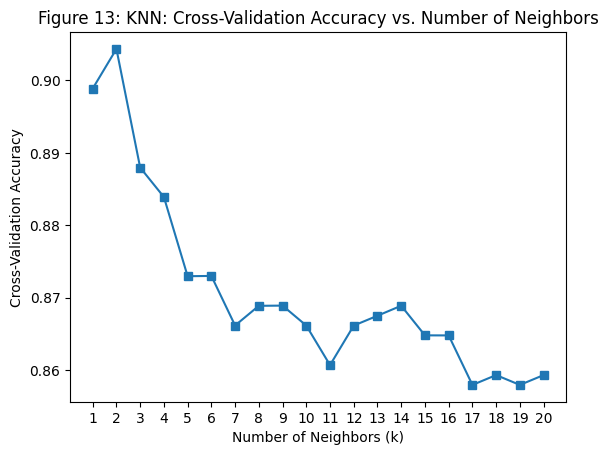

In [ ]:
#Plotting the cross-validation scores to identify the optimal K
plt.plot(k_grid, cv_scores, marker = "s")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Figure 13: KNN: Cross-Validation Accuracy vs. Number of Neighbors')
plt.xticks(np.arange(min(k_grid), max(k_grid) + 1, 1))
plt.show()

In [ ]:
# Print K and the corresponding cross-validation scores
for k, score in zip(k_grid, cv_scores):
    print(f"K = {k}, Cross-Validation Accuracy = {score:.2f}")


K = 1, Cross-Validation Accuracy = 0.90
K = 2, Cross-Validation Accuracy = 0.90
K = 3, Cross-Validation Accuracy = 0.89
K = 4, Cross-Validation Accuracy = 0.88
K = 5, Cross-Validation Accuracy = 0.87
K = 6, Cross-Validation Accuracy = 0.87
K = 7, Cross-Validation Accuracy = 0.87
K = 8, Cross-Validation Accuracy = 0.87
K = 9, Cross-Validation Accuracy = 0.87
K = 10, Cross-Validation Accuracy = 0.87
K = 11, Cross-Validation Accuracy = 0.86
K = 12, Cross-Validation Accuracy = 0.87
K = 13, Cross-Validation Accuracy = 0.87
K = 14, Cross-Validation Accuracy = 0.87
K = 15, Cross-Validation Accuracy = 0.86
K = 16, Cross-Validation Accuracy = 0.86
K = 17, Cross-Validation Accuracy = 0.86
K = 18, Cross-Validation Accuracy = 0.86
K = 19, Cross-Validation Accuracy = 0.86
K = 20, Cross-Validation Accuracy = 0.86


K= 2 will be used as it has the highest score of 0.90

In [ ]:
#creating KNN classifier with K=2
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
#fitting the KNN model on the resampled training data
knn.fit(X2_resampled, y2_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [ ]:
# Using cross_val_predict to get predicted labels for each fold of cross-validation
predicted_labels3 = cross_val_predict(knn, X2_resampled, y2_resampled, cv=5)

# Calculating the full confusion matrix
conf_matrix3 = confusion_matrix(y2_resampled, predicted_labels3)

# Calculate the full classification report
class_report3 = classification_report(y2_resampled, predicted_labels3)

# Calculate accuracy
accuracy_knn = accuracy_score(y2_resampled, predicted_labels3)

# Calculate precision
precision_knn = precision_score(y2_resampled, predicted_labels3)

# Calculate recall
recall1_knn = recall_score(y2_resampled, predicted_labels3)

# Calculate F1 score
f1_knn = f1_score(y2_resampled, predicted_labels3)


# Print the full confusion matrix and classification report
print("Table 6A: KNN Model Confusion Matrix/Classification Report")
print("A. Confusion Matrix:")
print(conf_matrix3)
print("B. Classification Report:")
print(class_report3)
print("C. Accuracy: {:.2f}".format(accuracy_knn))
print("D. Precision: {:.2f}".format(precision_knn))
print("E. Recall (Sensitivity): {:.2f}".format(recall1_knn))
print("F. F1 Score: {:.2f}".format(f1_knn))

Table 6A: KNN Model Confusion Matrix/Classification Report
A. Confusion Matrix:
[[329  37]
 [ 33 333]]
B. Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       366
           1       0.90      0.91      0.90       366

    accuracy                           0.90       732
   macro avg       0.90      0.90      0.90       732
weighted avg       0.90      0.90      0.90       732

C. Accuracy: 0.90
D. Precision: 0.90
E. Recall (Sensitivity): 0.91
F. F1 Score: 0.90


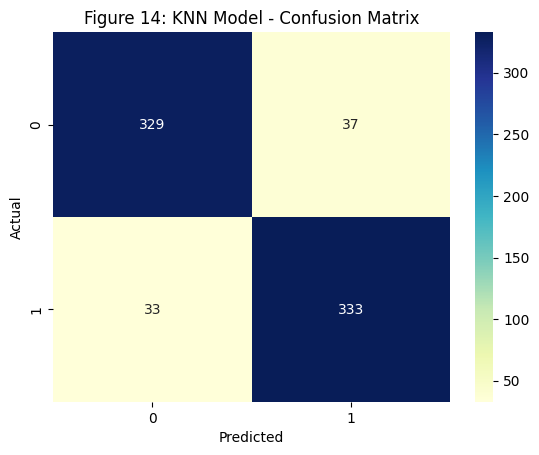

In [ ]:
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Figure 14: KNN Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

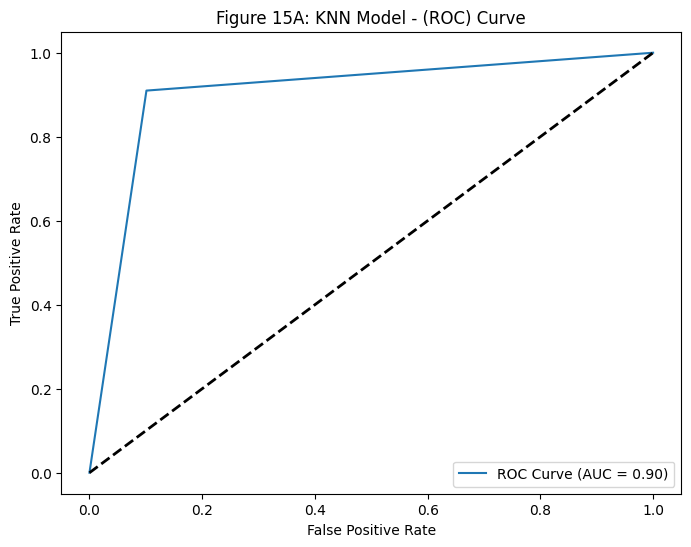

In [ ]:
predicted_probs3 = cross_val_predict(knn, X2_resampled, y2_resampled, cv=5)

# Calculate ROC-AUC
roc_auc3 = roc_auc_score(y2_resampled, predicted_probs3)

# Calculate ROC curve
fpr3, tpr3, _ = roc_curve(y2_resampled, predicted_probs3)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, label=f'ROC Curve (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 15A: KNN Model - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Making predictions on the test set of KNN
y_pred_test_knn = knn.predict(X2_test)

# Calculating metrics
accuracy_test_knn = accuracy_score(y2_test, y_pred_test_knn)
precision_test_knn = precision_score(y2_test, y_pred_test_knn)
recall_test_knn = recall_score(y2_test, y_pred_test_knn)
f1_test_knn = f1_score(y2_test, y_pred_test_knn)
conf_matrix_test_knn = confusion_matrix(y2_test, y_pred_test_knn)

# Printing the evaluation metrics
print("Table 6B: KNN - Test Set- Confusion Matrix/Classification Report")
print("Accuracy: {:.2f}".format(accuracy_test_knn))
print("Precision: {:.2f}".format(precision_test_knn))
print("Recall (Sensitivity): {:.2f}".format(recall_test_knn))
print("F1 Score: {:.2f}".format(f1_test_knn))
print("Confusion Matrix:")
print(conf_matrix_test_knn)

Table 6B: KNN - Test Set- Confusion Matrix/Classification Report
Accuracy: 0.76
Precision: 0.50
Recall (Sensitivity): 0.57
F1 Score: 0.53
Confusion Matrix:
[[71 16]
 [12 16]]


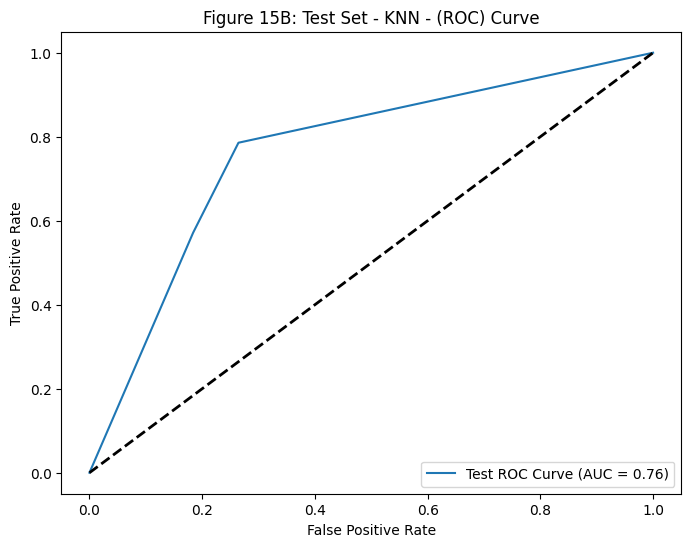

In [ ]:
# Making predictions on the test set of Logistic Regression
predicted_probs_test_knn = knn.predict_proba(X2_test)[:, 1]

# Calculate ROC-AUC on the test set
roc_auc_test_knn = roc_auc_score(y2_test, predicted_probs_test_knn)

# Calculate ROC curve on the test set
fpr_test_knn, tpr_test_knn, _ = roc_curve(y2_test, predicted_probs_test_knn)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_knn, tpr_test_knn, label=f'Test ROC Curve (AUC = {roc_auc_test_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 15B: Test Set - KNN - (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Section 5: Summary of the findings**

**5.1 Evaluations**

In [ ]:
import pandas as pd

# setting evaluations
evaluations = {
    'Model': ['LR Training', 'LR Test', 'KNN Training', 'KNN Test'],
    'Accuracy': [accuracy_LR, accuracy_test_LR, accuracy_knn, accuracy_test_knn],
    'Precision': [precision_LR, precision_test_LR, precision_knn, precision_test_knn],
    'Recall (Sensitivity)': [recall1_LR, recall_test_LR, recall1_knn, recall_test_knn],
    'F1 Score': [f1_LR, f1_test_LR, f1_knn, f1_test_knn]
}

# Creating a DataFrame
results_df = pd.DataFrame(evaluations)

# Displaying the combined evaluation results
print(results_df)

          Model  Accuracy  Precision  Recall (Sensitivity)  F1 Score
0   LR Training  0.846995   0.805288              0.915301  0.856777
1       LR Test  0.773913   0.525000              0.750000  0.617647
2  KNN Training  0.904372   0.900000              0.909836  0.904891
3      KNN Test  0.756522   0.500000              0.571429  0.533333


**5.2 ROC curves**

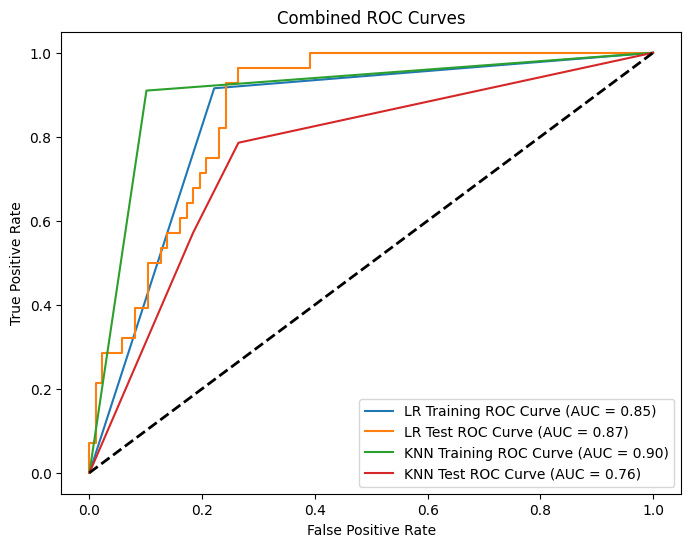

In [ ]:
# Creating a figure
plt.figure(figsize=(8, 6))

# Plotting the ROC curves for LR training and test sets
plt.plot(fpr2, tpr2, label=f'LR Training ROC Curve (AUC = {roc_auc2:.2f})')
plt.plot(fpr_test_LR, tpr_test_LR, label=f'LR Test ROC Curve (AUC = {roc_auc_test_LR:.2f})')

# Plotting the ROC curves for KNN training and test sets
plt.plot(fpr3, tpr3, label=f'KNN Training ROC Curve (AUC = {roc_auc3:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, label=f'KNN Test ROC Curve (AUC = {roc_auc_test_knn:.2f})')

# Plotting the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Adding labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Summary: Combined ROC Curves')
plt.legend(loc='lower right')

# Display the graph
plt.show()
